In [23]:
import pandas as pd
import nltk

In [24]:
df1 = pd.read_csv('comment_5_stars_1.csv')
df2 = pd.read_csv('comment_5_stars_2.csv')
df3 = pd.read_excel('comment_low_stars_1.xlsx')
df4 = pd.read_excel('comment_low_stars_2.xlsx')

In [25]:
data = pd.read_excel('Emotionalscore_new.xlsx')
print(data.info())
print(data.shape)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2653 non-null   int64  
 1   date             2653 non-null   object 
 2   length           2653 non-null   int64  
 3   corpus           2653 non-null   object 
 4   stars            2653 non-null   int64  
 5   helpfulness      2653 non-null   int64  
 6   Sentiment Score  2653 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 145.2+ KB
None
(2653, 7)


,Unnamed: 0,date,length,corpus,stars,helpfulness,Sentiment Score
0,0,2022/04/26,22,dress super cute comfy cant wait wear dress va...,5,1806,0.8555
1,1,2022/06/04,8,cute lt3 like pls im broke,5,1150,0.4588
2,2,2022/06/03,132,oh im obsessed cutest dainty dress thats perfe...,5,734,0.9863
3,3,2022/05/10,16,love dress fits perfect size medium chest,5,378,0.8360
4,4,2022/04/21,5,obsessed fit perfect,5,305,0.6705


In [26]:
# 检查空值
data.isna().sum()

Unnamed: 0         0
date               0
length             0
corpus             0
stars              0
helpfulness        0
Sentiment Score    0
dtype: int64

In [27]:
data.describe()

,Unnamed: 0,length,stars,helpfulness,Sentiment Score
count,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000
mean,401.573313,18.281568,4.188466,4.356201,0.550982
std,262.750276,15.427795,1.085654,47.672630,0.365466
min,0.000000,1.000000,1.000000,0.000000,-0.822500
25%,166.000000,8.000000,3.000000,0.000000,0.361200
50%,384.000000,14.000000,5.000000,0.000000,0.648600
75%,606.000000,24.000000,5.000000,1.000000,0.840200
max,1007.000000,132.000000,5.000000,1806.000000,0.998000


# 描述性分析

## 两条裙子的分布情况 

In [10]:
frame1 = [df1,df3]
df_1 = pd.concat(frame1)
ones_column = pd.Series(1, index=df_1.index)
df_1['type'] = ones_column

print(df_1.info())
df_1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 0 to 175
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         954 non-null    object
 1   length       954 non-null    int64 
 2   corpus       954 non-null    object
 3   stars        954 non-null    int64 
 4   helpfulness  954 non-null    int64 
 5   type         954 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 52.2+ KB
None


,date,length,corpus,stars,helpfulness,type
0,2022/3/7,25,feel beautiful dress true size little big brea...,5,256,1
1,2022/5/20,41,dress fits amazing color material fit wow 34d ...,5,177,1
2,2022/3/17,7,cute dress wear church,5,149,1
3,2022/5/16,33,dress pretty got compliments perfect springsum...,5,75,1
4,2022/5/30,26,new favorite dress ive worn times already love...,5,65,1
...,...,...,...,...,...,...
171,2022-04-29 00:00:00,22,came kinda big tbh made look sorta wide still ...,4,0,1
172,2022-04-19 00:00:00,17,gusta pero se todo debern de poner algo para q...,4,0,1
173,2022-07-24 00:00:00,2,big,4,0,1
174,2023-06-08 00:00:00,3,fit small,4,0,1


In [11]:
frame2 = [df2,df4]
df_2 = pd.concat(frame2)
twos_column = pd.Series(2, index=df_2.index)
df_2['type'] = twos_column

print(df_2.info())
df_2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1834 non-null   object 
 1   length       1834 non-null   float64
 2   corpus       1827 non-null   object 
 3   stars        1834 non-null   float64
 4   helpfulness  1834 non-null   float64
 5   type         1962 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 107.3+ KB
None


,date,length,corpus,stars,helpfulness,type
0,2022/4/26,22.0,dress super cute comfy cant wait wear dress va...,5.0,1806.0,2
1,2022/6/4,8.0,cute lt3 like pls im broke,5.0,1150.0,2
2,2022/6/3,132.0,oh im obsessed cutest dainty dress thats perfe...,5.0,734.0,2
3,2022/5/10,16.0,love dress fits perfect size medium chest,5.0,378.0,2
4,2022/4/21,5.0,obsessed fit perfect,5.0,305.0,2


In [12]:
df_1.describe()

,length,stars,helpfulness,type
count,954.000000,954.000000,954.000000,954.0
mean,13.841719,4.678197,1.370021,1.0
std,11.736040,0.776225,12.318967,0.0
min,1.000000,1.000000,0.000000,1.0
25%,6.000000,5.000000,0.000000,1.0
50%,10.000000,5.000000,0.000000,1.0
75%,18.000000,5.000000,0.000000,1.0
max,127.000000,5.000000,256.000000,1.0


In [13]:
df_2.describe()

,length,stars,helpfulness,type
count,1834.000000,1834.000000,1834.000000,1962.0
mean,20.967285,3.992366,5.595965,2.0
std,17.624223,1.130322,56.607595,0.0
min,0.000000,1.000000,0.000000,2.0
25%,9.000000,3.000000,0.000000,2.0
50%,16.000000,4.000000,0.000000,2.0
75%,27.000000,5.000000,1.000000,2.0
max,174.000000,5.000000,1806.000000,2.0


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

KeyError: 'dress_1'

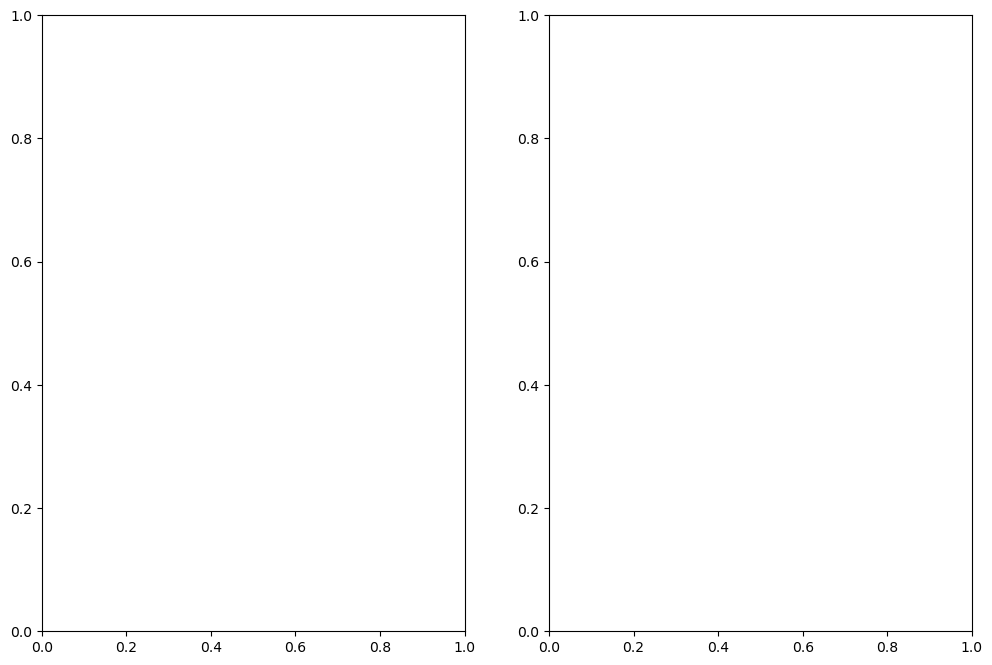

In [15]:
# 星级的核密度分布
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

titles = ['dress_1','dress_2']

for i, title in enumerate(titles):
    data_1 = data[title]
    row = i // 4
    col = i % 4
    sns.kdeplot(data_1,shade=True,ax=axs[row, col])
    axs[row, col].set_xlabel(title)
    
fig.tight_layout()
plt.show()

## 总评论的数据分布情况 

# 词频

In [16]:
data = data['corpus']
data.to_list()

['dress super cute comfy cant wait wear dress vacation fits like imagined',
 'cute lt3 like pls im broke',
 'oh im obsessed cutest dainty dress thats perfect summer got option attend graduation perfect modest sweet hot time absolutely cottagecore picnic look im thicker girl 53 150160 lbs slight pear shaped body absolutely incredibly beautiful curvy bodies feel body confident havent felt long huge steal price confidence gave absolutely ladies gorgeous gorgeous piece perfect length breathable flowy linen material total bridgerton vibes dress chest area 34c damn flattering hair ribbon shein',
 'love dress fits perfect size medium chest',
 'obsessed fit perfect',
 'got 30 bday new orleans loved flattering thick thin fit perfectly big hit im 34d fit great boobs new favorite sundress',
 'dress new favorite hugs waist bust adjustable slit side perfect placement helps please like points measurements correct',
 'feel beautiful dress true size little big breast area small boobs ware',
 'frickin 

In [17]:
word_list = []
for text in data:
    words = text.split()
    word_list.extend(words)

print(word_list)

['dress', 'super', 'cute', 'comfy', 'cant', 'wait', 'wear', 'dress', 'vacation', 'fits', 'like', 'imagined', 'cute', 'lt3', 'like', 'pls', 'im', 'broke', 'oh', 'im', 'obsessed', 'cutest', 'dainty', 'dress', 'thats', 'perfect', 'summer', 'got', 'option', 'attend', 'graduation', 'perfect', 'modest', 'sweet', 'hot', 'time', 'absolutely', 'cottagecore', 'picnic', 'look', 'im', 'thicker', 'girl', '53', '150160', 'lbs', 'slight', 'pear', 'shaped', 'body', 'absolutely', 'incredibly', 'beautiful', 'curvy', 'bodies', 'feel', 'body', 'confident', 'havent', 'felt', 'long', 'huge', 'steal', 'price', 'confidence', 'gave', 'absolutely', 'ladies', 'gorgeous', 'gorgeous', 'piece', 'perfect', 'length', 'breathable', 'flowy', 'linen', 'material', 'total', 'bridgerton', 'vibes', 'dress', 'chest', 'area', '34c', 'damn', 'flattering', 'hair', 'ribbon', 'shein', 'love', 'dress', 'fits', 'perfect', 'size', 'medium', 'chest', 'obsessed', 'fit', 'perfect', 'got', '30', 'bday', 'new', 'orleans', 'loved', 'flatt

In [18]:
word_count = {}
for word in word_list:
    if word not in word_count:
            word_count[word] = 1
    else:
        word_count[word] += 1
sorted(word_count.items(), key=lambda item:item[1], reverse=True)

[('dress', 1218),
 ('cute', 882),
 ('love', 673),
 ('like', 405),
 ('size', 381),
 ('fit', 379),
 ('material', 344),
 ('little', 333),
 ('super', 301),
 ('fits', 281),
 ('perfect', 267),
 ('pretty', 260),
 ('small', 240),
 ('big', 229),
 ('really', 221),
 ('wear', 194),
 ('beautiful', 185),
 ('im', 181),
 ('thin', 178),
 ('looks', 159),
 ('great', 154),
 ('chest', 153),
 ('bit', 152),
 ('well', 148),
 ('area', 146),
 ('quality', 142),
 ('tight', 134),
 ('got', 133),
 ('summer', 126),
 ('flattering', 125),
 ('bust', 123),
 ('true', 122),
 ('top', 121),
 ('much', 109),
 ('waist', 107),
 ('definitely', 107),
 ('fabric', 106),
 ('look', 105),
 ('picture', 101),
 ('recommend', 98),
 ('absolutely', 96),
 ('large', 94),
 ('color', 93),
 ('zipper', 91),
 ('perfectly', 87),
 ('back', 84),
 ('sleeves', 82),
 ('cheap', 81),
 ('way', 80),
 ('still', 79),
 ('loved', 76),
 ('one', 76),
 ('comfortable', 75),
 ('boobs', 74),
 ('ordered', 74),
 ('long', 72),
 ('weird', 72),
 ('though', 71),
 ('product'

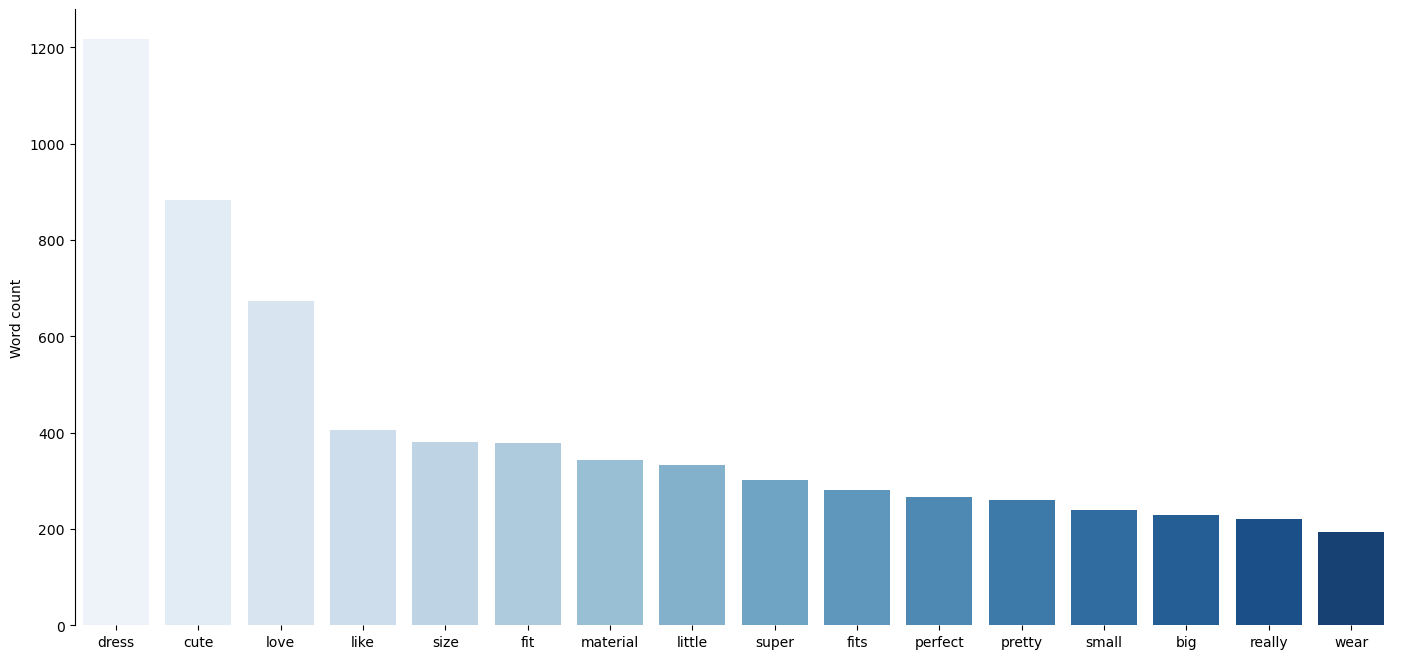

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

word_sort = sorted(word_count.items(), key=lambda d: d[1], reverse=True)
word_sort = word_sort[:16]
x = []
y = []
for word in word_sort:
    x.append(word[0])
    y.append(word[1])

plt.style.use({'figure.figsize': (17, 8)})
#sns.barplot(x=x, y=y, palette="BuPu_r")
sns.barplot(x=x, y=y, palette="Blues")
plt.ylabel('Word count')
# 数据可视化：柱状图
sns.despine(bottom=True)
#存储图片
plt.savefig("Top 15 words.png")

plt.show()

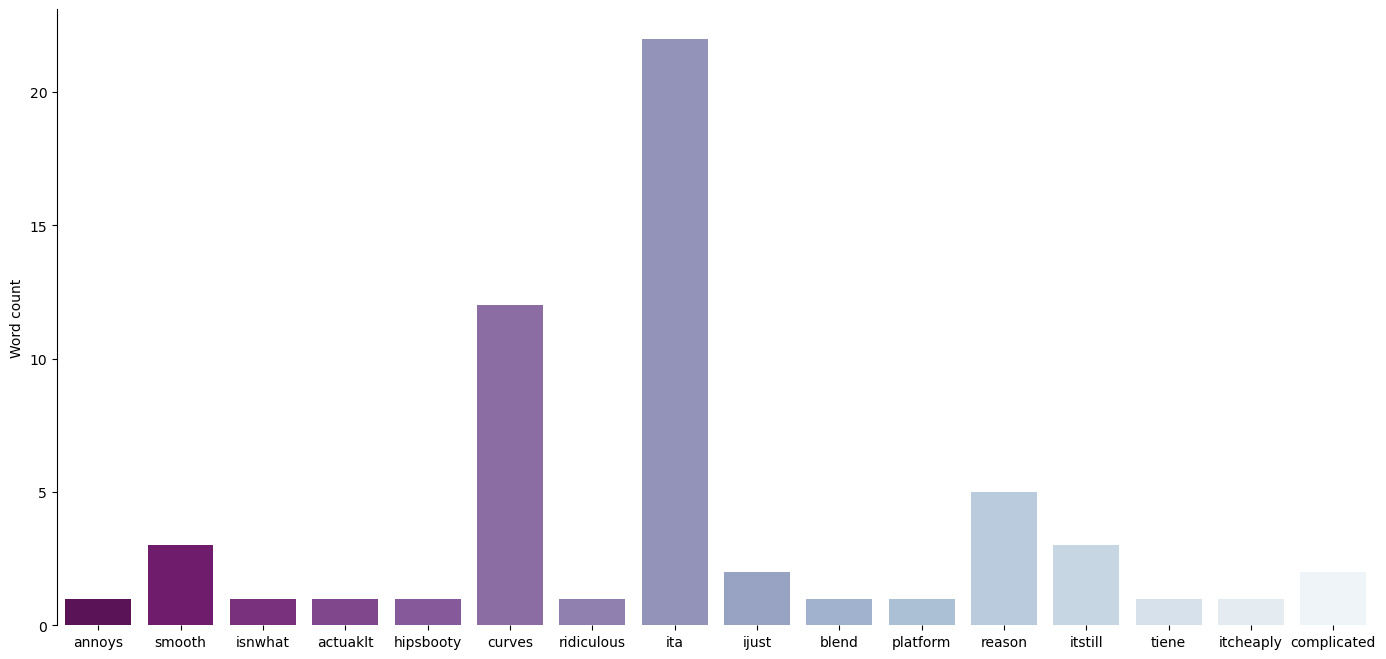

In [20]:
import random

word_sort = sorted(word_count.items(), key=lambda d: d[1], reverse=True)
word_sort = random.sample(word_sort, 16)
x = []
y = []
for word in word_sort:
    x.append(word[0])
    y.append(word[1])

plt.style.use({'figure.figsize': (17, 8)})
sns.barplot(x=x, y=y, palette="BuPu_r")
plt.ylabel('Word count')
# 数据可视化：柱状图
sns.despine(bottom=True)
plt.show()

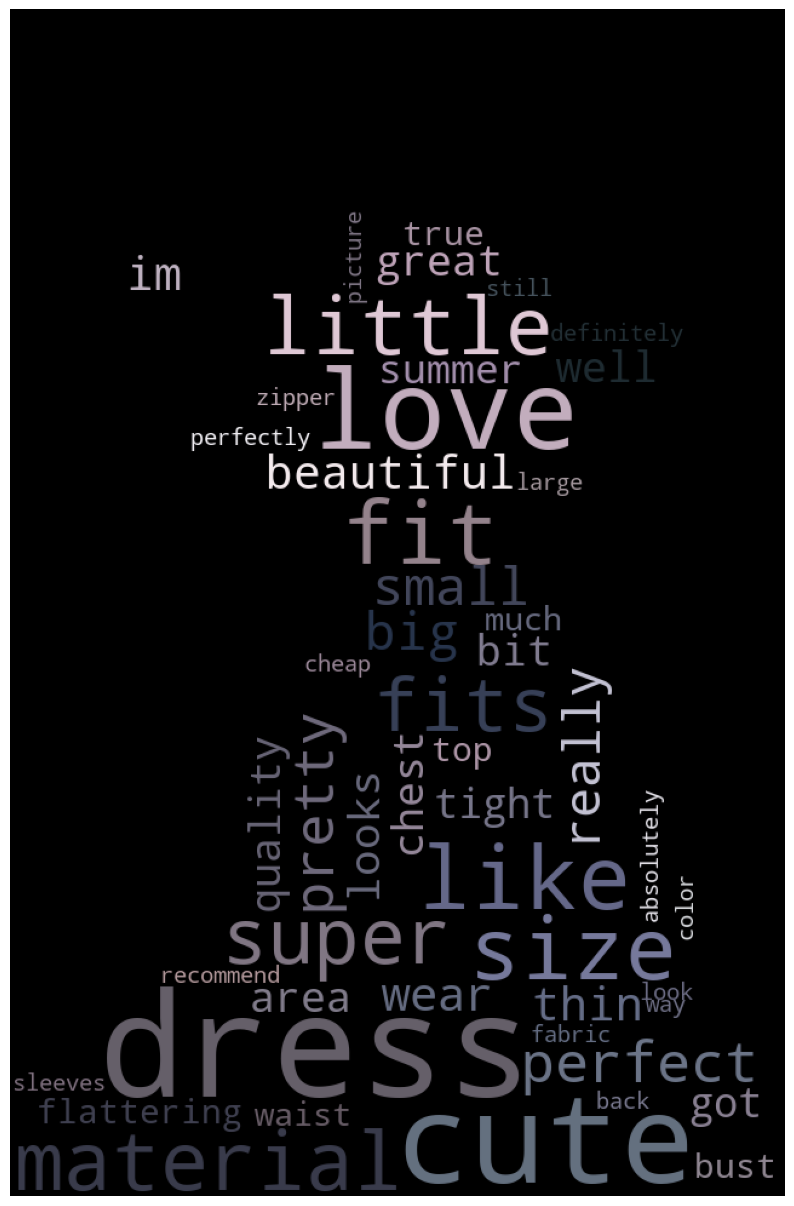

<Figure size 1000x1600 with 0 Axes>

In [116]:
import numpy as np
import wordcloud  # 词云展示库
from PIL import Image  # 图像处理库

plt.style.use({'figure.figsize': (10, 16)})
mask = np.array(Image.open('2020051119552942.jpg'))  # 定义词频背景
wc = wordcloud.WordCloud(
    mask=mask,  # 设置背景图
    max_words=50,  # 最多显示词数
    max_font_size=120  # 字体最大值
)
word_sort = sorted(word_count.items(), key=lambda d: d[1], reverse=True)
word_cloud = dict(word_sort)
wc.generate_from_frequencies(word_cloud)  # 从字典生成词云
image_colors = wordcloud.ImageColorGenerator(mask)  # 从背景图建立颜色方案
wc.recolor(color_func=image_colors)  # 将词云颜色设置为背景图方案
plt.imshow(wc)  # 显示词云
plt.axis('off')  # 关闭坐标轴
plt.show()  # 显示图像
plt.savefig('wordcloud.jpg')

# 回归分析

In [31]:
data = pd.read_excel('data_3.2.xlsx')
print(data.info())
print(data.shape)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   helpfulness_category    2555 non-null   int64  
 1   corpus                  2555 non-null   int64  
 2   helpfulness_min-max标准化  2555 non-null   float64
 3   stars                   2555 non-null   int64  
 4   SS                      2555 non-null   int64  
 5   length                  2555 non-null   int64  
 6   LS                      2555 non-null   int64  
 7   Sentiment Score         2555 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 159.8 KB
None
(2555, 8)


,helpfulness_category,corpus,helpfulness_min-max标准化,stars,SS,length,LS,Sentiment Score
0,3,1,1.000000,5,25,22,484,0.8555
1,3,2,0.636766,5,25,8,64,0.4588
2,3,3,0.406423,5,25,132,17424,0.9863
3,3,4,0.209302,5,25,16,256,0.8360
4,3,5,0.168882,5,25,5,25,0.6705


描述性统计

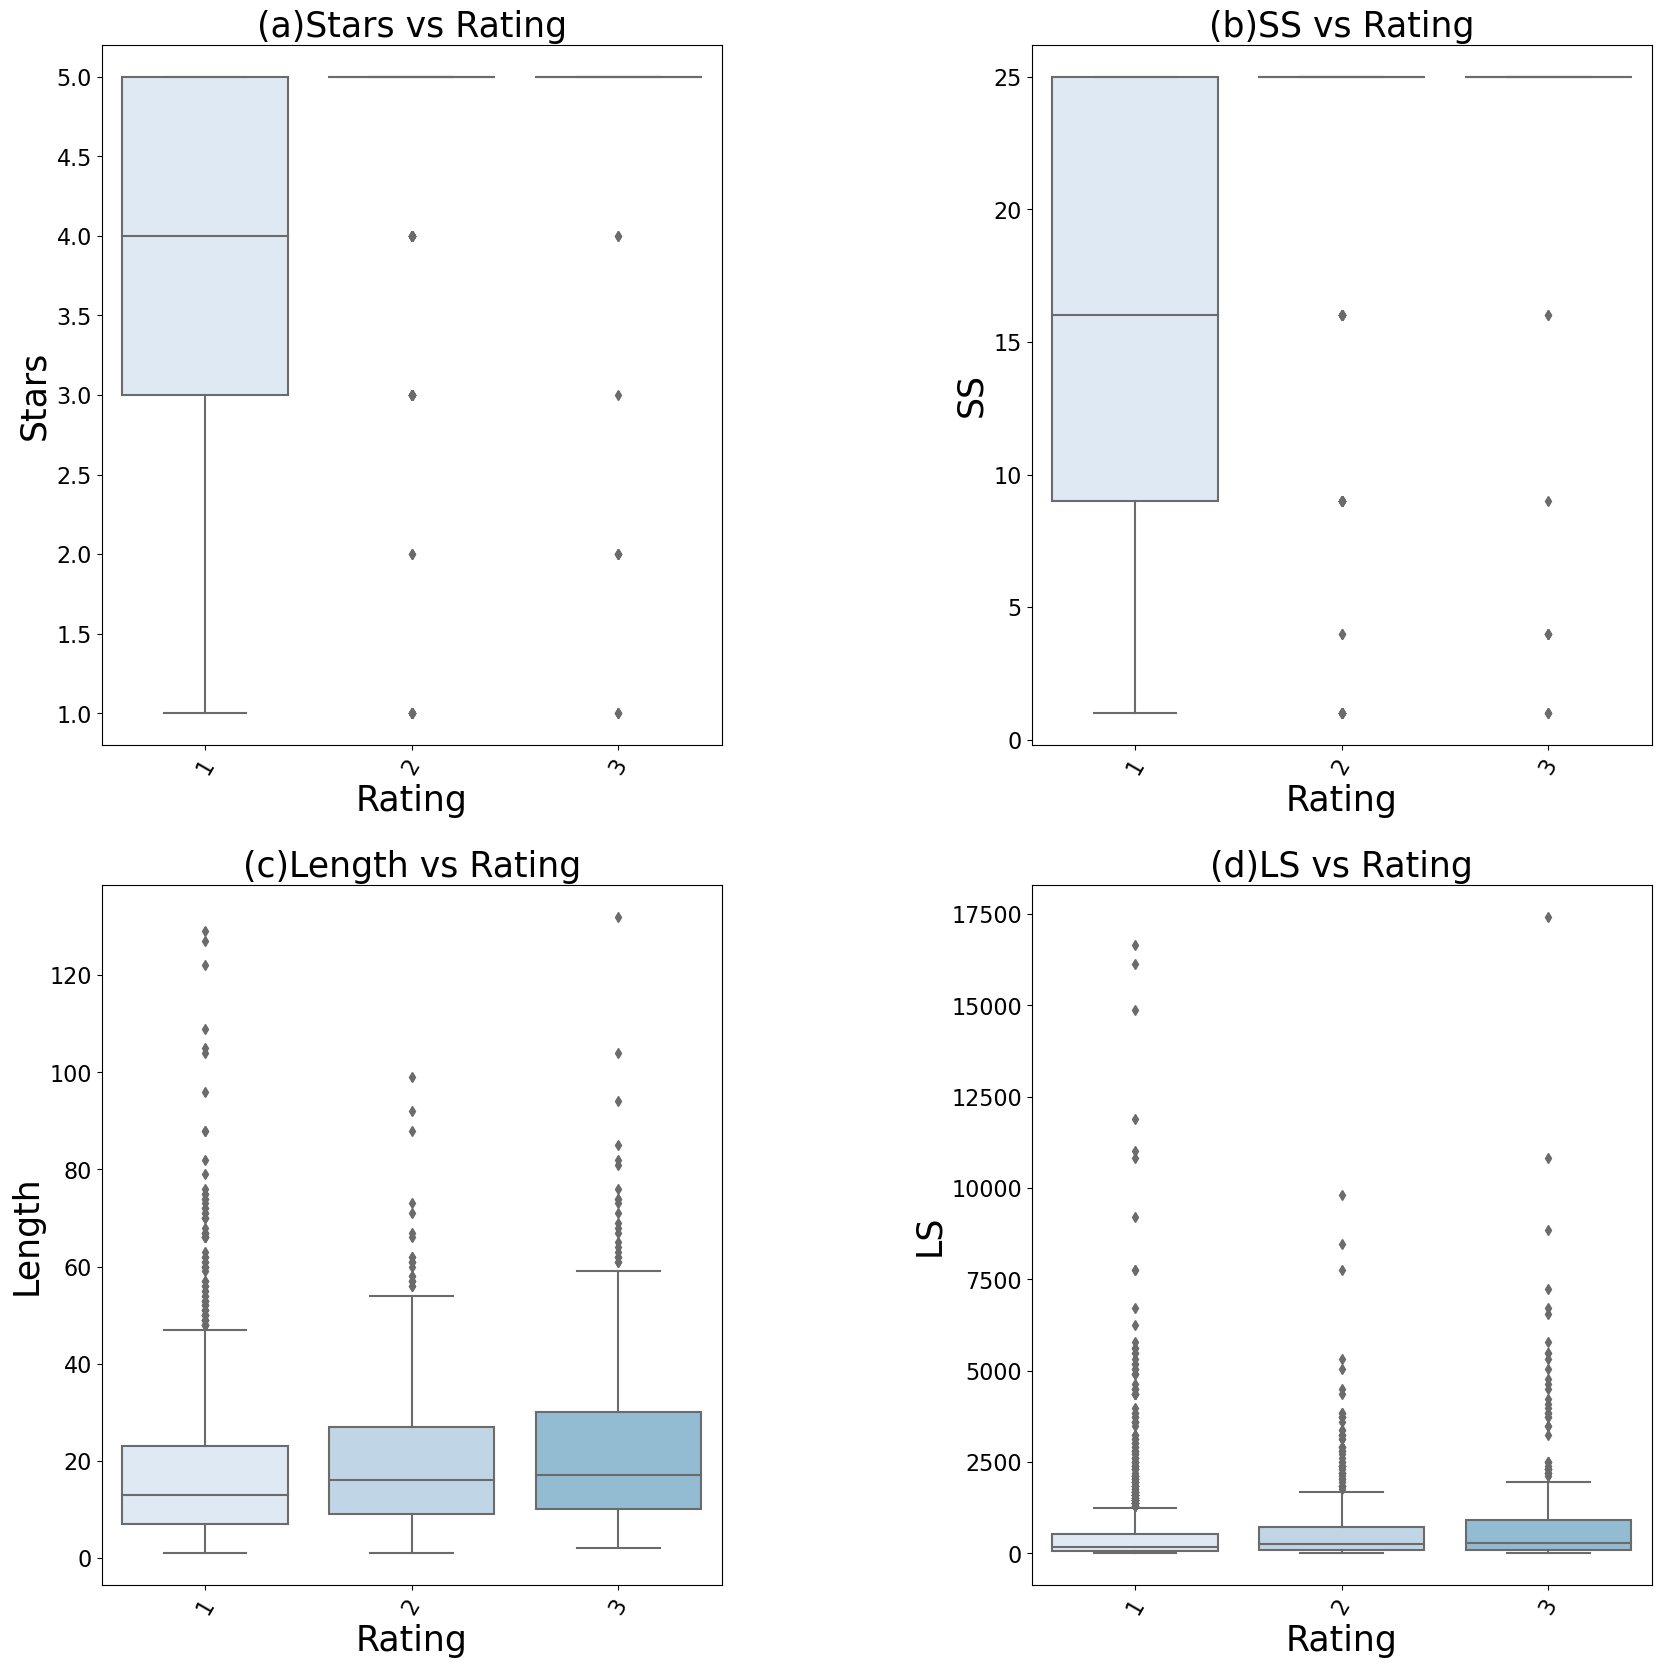

In [35]:
#箱型图
df = data
fig,axs = plt.subplots(2,2,figsize=(20,20))
palette = sns.color_palette('Blues')

for ax in axs.flatten():
    ax.set_xlabel('X Label', fontsize=25) 
    ax.set_ylabel('Y Label', fontsize=25)  
    ax.set_title('Title', fontsize=25)           
    ax.tick_params(axis='both', labelsize=16)   

sns.boxplot(ax=axs[0,0],x=df['helpfulness_category'],y=df['stars'],palette=palette)
axs[0,0].set_xlabel('Rating')
axs[0,0].set_ylabel('Stars')
axs[0,0].set_title('(a)Stars vs Rating', fontsize=25)
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(),rotation=60)

sns.boxplot(ax=axs[0,1],x=df['helpfulness_category'],y=df['SS'],palette=palette)
axs[0,1].set_xlabel('Rating')
axs[0,1].set_ylabel('SS')
axs[0,1].set_title('(b)SS vs Rating',fontsize=25)
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(),rotation=60)

sns.boxplot(ax=axs[1,0],x=df['helpfulness_category'],y=df['length'],palette=palette)
axs[1,0].set_xlabel('Rating')
axs[1,0].set_ylabel('Length')
axs[1,0].set_title('(c)Length vs Rating', fontsize=25)
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(),rotation=60)

sns.boxplot(ax=axs[1,1],x=df['helpfulness_category'],y=df['LS'],palette=palette)
axs[1,1].set_xlabel('Rating')
axs[1,1].set_ylabel('LS')
axs[1,1].set_title('(d)LS vs Rating', fontsize=25)
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(),rotation=60)

plt.subplots_adjust(wspace=0.5)

fig.savefig("boxplot.png")

相关性分析

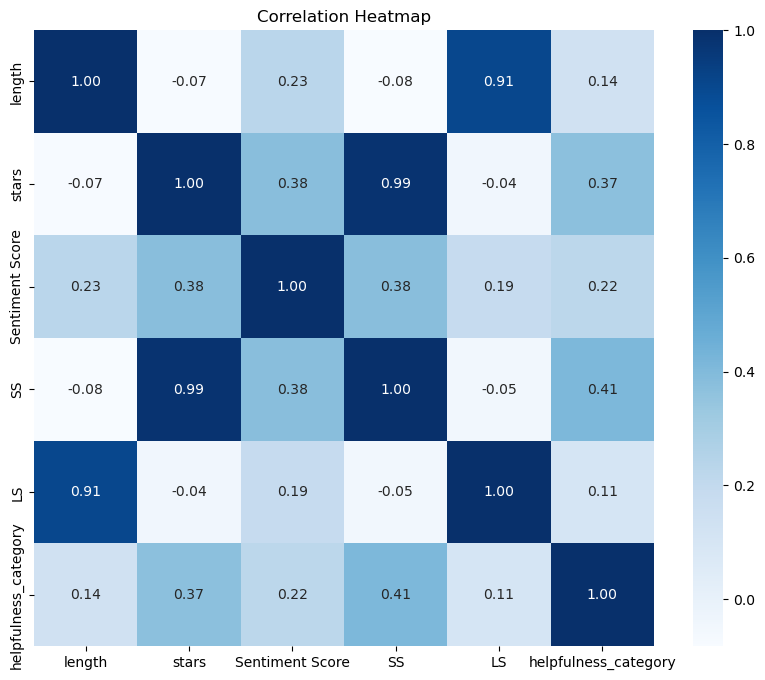

In [33]:
# 选择相关的列
selected_columns = ['length', 'stars', 'Sentiment Score', 'SS', 'LS', 'helpfulness_category']
selected_data = data[selected_columns]

# 计算相关性矩阵
correlation_matrix = selected_data.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()